# Blackwell Buying Patterns - EDA

Updated: 2020.07.2

Summary: The objective of this project is to provide an answer to the below questions:
 1. Do customers in different regions spend more per transaction? Which regions spend the most/least?
 2. Is there a relationship between the number of items purchased and amount spent?

## Import Packages

In [5]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [78]:
pwd

'C:\\Users\\PLZ1669\\Desktop\\Data Analytics Certificate Program\\Course One'

In [79]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 4AF2-2EB8

 Directory of C:\Users\PLZ1669\Desktop\Data Analytics Certificate Program\Course One

07/02/2020  10:52 PM    <DIR>          .
07/02/2020  10:52 PM    <DIR>          ..
06/29/2020  09:56 PM    <DIR>          .ipynb_checkpoints
06/28/2020  10:47 PM        12,181,949 6.22.2020 Notes.rtf
07/02/2020  02:18 AM            70,354 C1 T1 Memo.docx
06/28/2020  10:54 PM           206,117 conda-cheatsheet.pdf
06/22/2020  09:40 PM         1,348,525 Demographic_Data.csv
06/28/2020  10:16 PM         3,557,457 Getting the Basics of Correlation and Covariance.pdf
06/28/2020  07:00 PM           345,905 Pandas_Cheat_Sheet.pdf
07/02/2020  10:52 PM           307,737 Task 1 Course 1 - Blackwell - EDA.ipynb
06/28/2020  10:59 PM           407,329 Task 1.ipynb
06/29/2020  08:08 AM            10,526 Task 1.xlsx
               9 File(s)     18,435,899 bytes
               3 Dir(s)  423,780,499,456 bytes free


In [65]:
data = pd.read_csv('Demographic_Data.csv')
print(data.shape)

(80000, 5)


## Evaluate Data

In [66]:
data.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

In [67]:
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [68]:
data.columns

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


## Preprocess

### Duplicates

In [11]:
data.duplicated().any()

True

In [12]:
print(data[data.duplicated()].shape)
data[data.duplicated()]

(21, 5)


,in-store,age,items,amount,region
17858,0,76,6,283.61,2
26112,0,67,4,320.41,2
29343,1,23,2,1019.50,4
33834,1,38,3,1993.80,1
34214,1,31,5,1488.10,4
34706,0,39,5,1268.00,4
35971,0,38,7,391.51,2
43958,1,22,1,1303.20,4
44308,1,26,5,1495.70,4
45164,0,79,6,342.28,2


In [13]:
data = data.drop_duplicates()
data.duplicated().any()

False

### Null Values

In [14]:
data.isnull().any()

in-store    False
age         False
items       False
amount      False
region      False
dtype: bool

In [15]:
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


### Discretize

In [3]:
dataset = 'Demographic_Data.csv'
df=pd.read_csv(dataset,header=0)
df.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [4]:
df['Amount($)']=pd.cut(df['amount'],3,labels=['Below 1,000','1,000 to 2,000','Over 2,000'])

df.head(10)

,in-store,age,items,amount,region,Amount($)
0,0,37,4,281.0300,2,"Below 1,000"
1,0,35,2,219.5100,2,"Below 1,000"
2,1,45,3,1525.7000,4,"1,000 to 2,000"
3,1,46,3,715.2500,3,"Below 1,000"
4,1,33,4,1937.5000,1,"1,000 to 2,000"
5,0,24,3,1314.2000,4,"1,000 to 2,000"
6,0,43,6,8.5472,2,"Below 1,000"
7,1,66,5,819.9800,3,"Below 1,000"
8,1,51,5,908.3100,1,"Below 1,000"
9,1,47,3,767.5400,1,"Below 1,000"


## Analyze Data

### Statistical Analysis

In [70]:
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


### Visualizations

In [71]:
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


#### Histogram

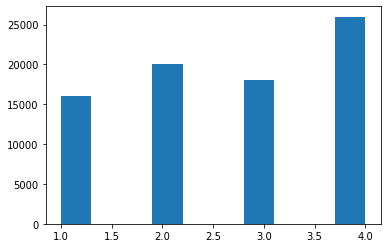

In [18]:
plt.hist(data['region'])
plt.show()

(array([15997., 19994., 18000., 25988.]),
 array([1.  , 1.75, 2.5 , 3.25, 4.  ]),
 <a list of 4 Patch objects>)

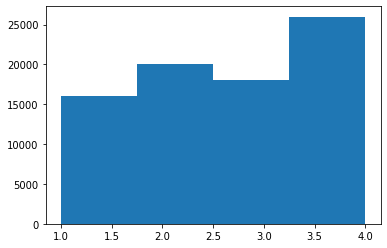

In [19]:
plt.hist(data['region'], bins=4)

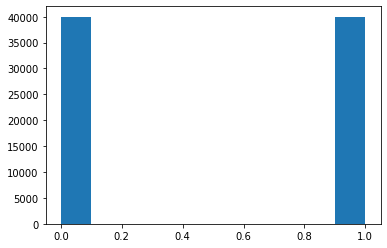

In [20]:
plt.hist(data['in-store'])
plt.show()

(array([39989.,     0.,     0., 39990.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 <a list of 4 Patch objects>)

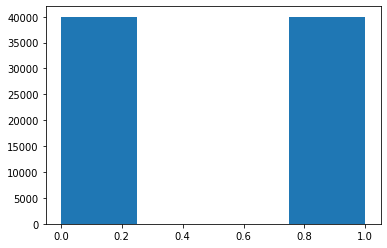

In [21]:
plt.hist(data['in-store'], bins=4)

#### Line Plot

In [23]:
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

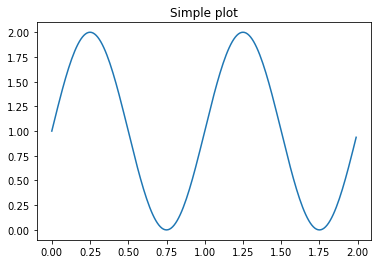

In [24]:
fig, ax = plt.subplots()
ax.plot(t, s)
ax.set_title('Simple plot')
plt.show()

#### Scatter plot

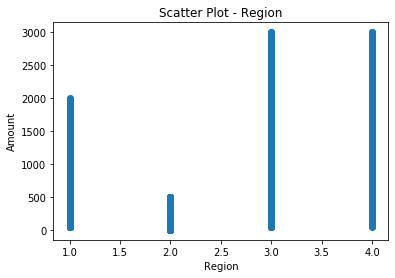

In [42]:
data_sample = data.sample(8000)
x = data_sample["region"]
y = data_sample['amount']
plt.scatter(x,y, marker='o')
plt.title("Scatter Plot - Region")
plt.xlabel("Region")
plt.ylabel("Amount")
plt.show()

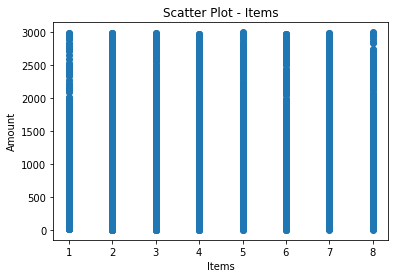

In [43]:
data_sample = data.sample(8000)
x = data_sample["items"]
y = data_sample['amount']
plt.scatter(x,y, marker='o')
plt.title("Scatter Plot - Items")
plt.xlabel("Items")
plt.ylabel("Amount")
plt.show()

#### Box Plot

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


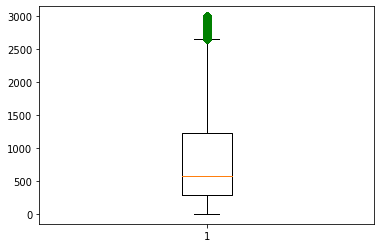

In [72]:
header = data.dtypes.index
print(header)

A = data['amount']
plt.boxplot(A,0,'gD')
plt.show()

#### Stacked Column

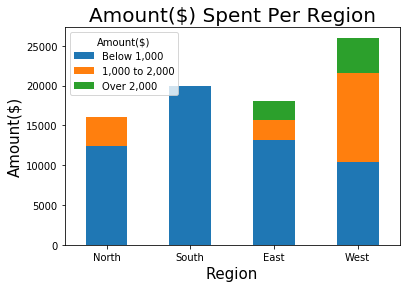

In [39]:
df.groupby(['region','Amount($)']).size().unstack().plot(kind='bar',stacked=True)
plt.title('Amount($) Spent Per Region', fontsize = 20)
plt.xlabel('Region', fontsize = 15)
plt.ylabel('Amount($)', fontsize = 15)
x1 = [0,1,2,3]
squad = ['North','South','East','West']
plt.xticks(x1, squad, rotation=0)

plt.show()

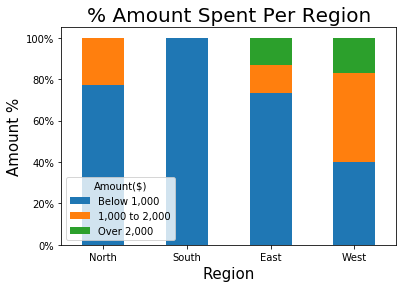

In [33]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

df.groupby(['region','Amount($)']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('% Amount Spent Per Region', fontsize = 20)
plt.xlabel('Region', fontsize = 15)
plt.ylabel('Amount %', fontsize = 15)

x1 = [0,1,2,3]
squad = ['North','South','East','West']

plt.xticks(x1, squad, rotation=0)

plt.show()

#### Bar Chart

In [50]:
# Number/count of transactions per region
data.groupby('region')['amount'].count()

region
1    16000
2    20000
3    18000
4    26000
Name: amount, dtype: int64

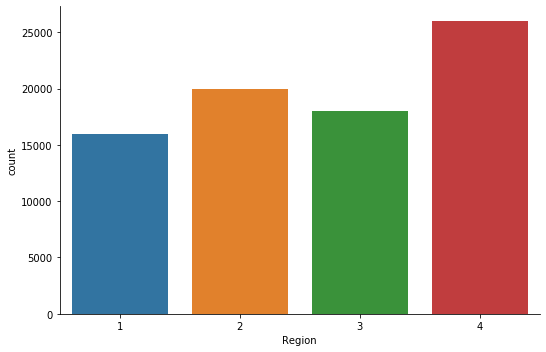

In [51]:
fg = sns.factorplot('region', data=data, kind='count', aspect=1.5)
fg.set_xlabels('Region')

In [52]:
# Number/count of transactions per item
data.groupby('items')['amount'].count()

items
1     5701
2    11290
3    11487
4    11596
5    11238
6    11522
7    11378
8     5788
Name: amount, dtype: int64

Text(-8.824999999999996, 0.5, 'Number of Transactions')

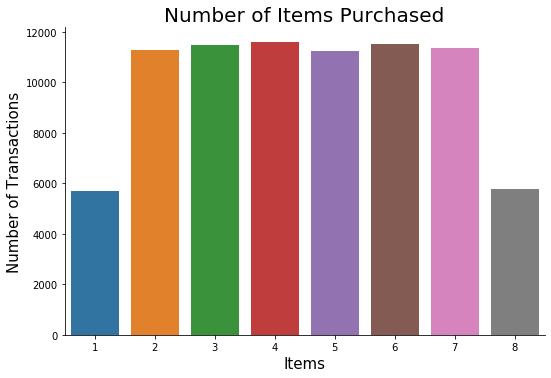

In [55]:
fg = sns.factorplot('items', data=data, kind='count', aspect=1.5)
fg.set_xlabels('Items')

plt.title('Number of Items Purchased', fontsize = 20)
plt.xlabel('Items', fontsize = 15)
plt.ylabel('Number of Transactions', fontsize = 15)

In [5]:
x=np.arange(5)
print(x)

[0 1 2 3 4]


In [45]:
#average of amount per region
data.groupby('region')['amount'].mean()

region
1     745.161491
2     252.109196
3     917.969637
4    1284.052012
Name: amount, dtype: float64

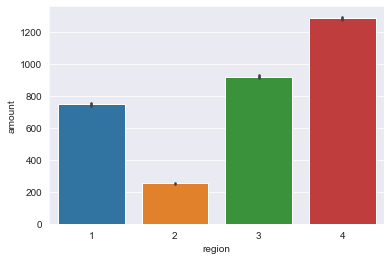

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

df = pd.read_csv('Demographic_Data.csv')
ax = sns.barplot(x=df['region'], y=df['amount'])

In [46]:
groupedvalues = data.groupby('region').mean().reset_index()
groupedvalues.head()

,region,in-store,age,items,amount
0,1,1.000000,43.703938,4.510063,745.161491
1,2,0.000000,56.610350,4.512750,252.109196
2,3,0.611056,45.646944,4.494000,917.969637
3,4,0.500038,38.750731,4.503462,1284.052012


[Text(0, 0, '1 - North'),
 Text(0, 0, '2 - South'),
 Text(0, 0, '3 - East'),
 Text(0, 0, '4 - West')]

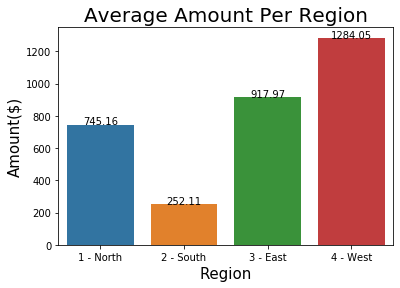

In [48]:
g =sns.barplot(x='region',y='amount',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.amount, round(row.amount,2), color='black', ha="center")
plt.title('Average Amount Per Region', fontsize = 20)
plt.xlabel('Region', fontsize = 15)
plt.ylabel('Amount($)', fontsize = 15)
g.set_xticklabels(['1 - North','2 - South','3 - East','4 - West'])

In [28]:
#average of amount per item
data.groupby('items')['amount'].mean()

items
1    825.386287
2    847.136035
3    836.694826
4    829.599524
5    834.303186
6    835.304430
7    830.138117
8    851.268593
Name: amount, dtype: float64

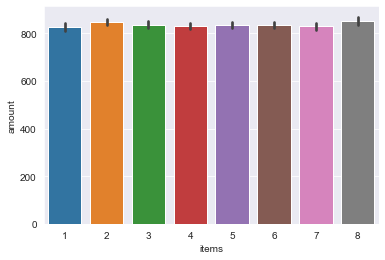

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

df = pd.read_csv('Demographic_Data.csv')
ax = sns.barplot(x=df['items'], y=df['amount'])

In [57]:
groupedvalues = data.groupby('items').mean().reset_index()
groupedvalues.head()

,items,in-store,age,amount,region
0,1,0.501666,45.969479,825.386287,2.690756
1,2,0.496723,45.721878,847.136035,2.680248
2,3,0.504919,45.577871,836.694826,2.680944
3,4,0.501983,45.712401,829.599524,2.652208
4,5,0.504716,45.765083,834.303186,2.679480


Text(0, 0.5, 'Amount')

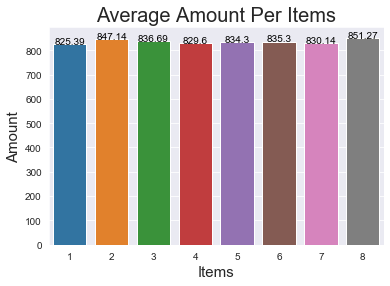

In [58]:
g =sns.barplot(x='items',y='amount',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.amount, round(row.amount,2), color='black', ha="center")
plt.title('Average Amount Per Items', fontsize = 20)
plt.xlabel('Items', fontsize = 15)
plt.ylabel('Amount', fontsize = 15)

## Feature Selection

### Correlation

In [46]:
corr_mat = data.corr()
print(corr_mat)

          in-store       age     items    amount    region
in-store  1.000000 -0.178180 -0.003897 -0.085573 -0.133171
age      -0.178180  1.000000  0.000657 -0.282033 -0.235370
items    -0.003897  0.000657  1.000000  0.000384 -0.001904
amount   -0.085573 -0.282033  0.000384  1.000000  0.403486
region   -0.133171 -0.235370 -0.001904  0.403486  1.000000


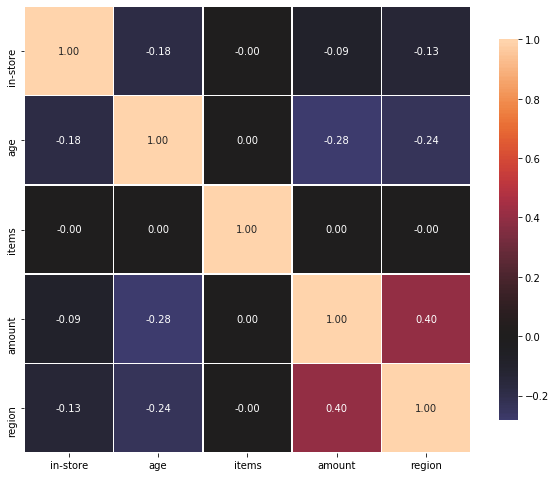

In [48]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_mat, vmax=1.0, center=0, fmt='.2f',
square=True, linewidth=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

### Covariance

In [49]:
cov_mat = data.cov()
print(cov_mat)

           in-store          age     items         amount      region
in-store   0.250003    -1.400071 -0.004017     -30.860425   -0.075019
age       -1.400071   246.966189  0.021270   -3196.782841   -4.167305
items     -0.004017     0.021270  4.248751       0.570791   -0.004421
amount   -30.860425 -3196.782841  0.570791  520221.252295  327.874873
region    -0.075019    -4.167305 -0.004421     327.874873    1.269321


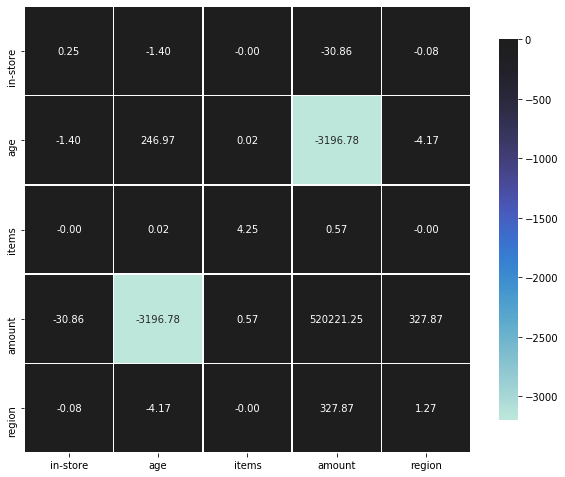

In [50]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cov_mat, vmax=1.0, center=0, fmt='.2f',
square=True, linewidth=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

## *Notes to Self
  

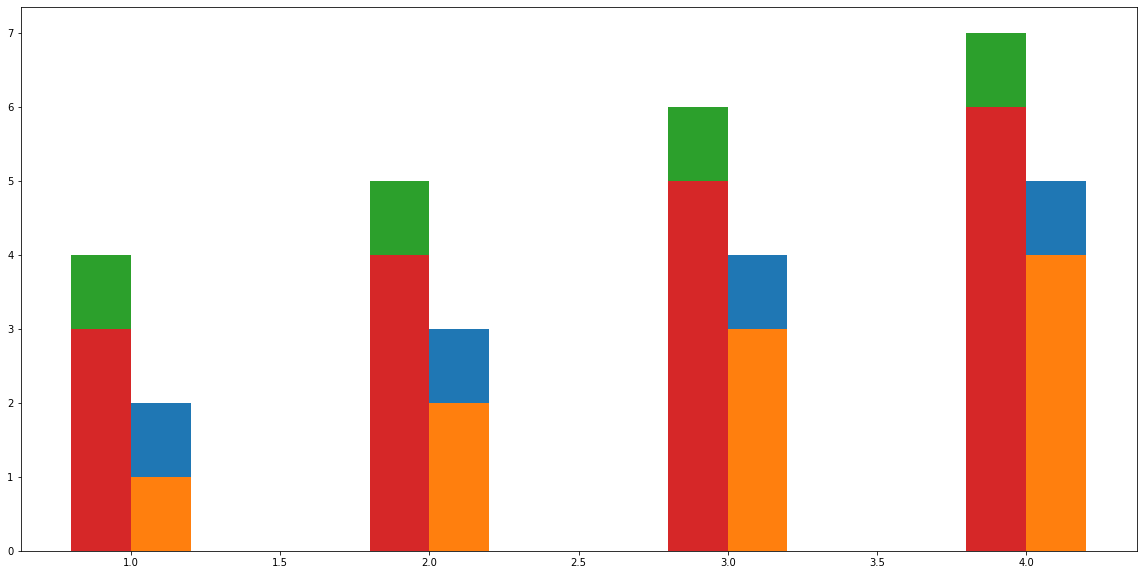

In [17]:
import pandas as pd

df = pd.DataFrame(dict(
    A=[1, 2, 3, 4],
    B=[2, 3, 4, 5],
    C=[3, 4, 5, 6],
    D=[4, 5, 6, 7]))

import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(20, 10))

ab_bar_list = [plt.bar([1, 2, 3, 4], df.B, align='edge', width= 0.2),
               plt.bar([1, 2, 3, 4], df.A, align='edge', width= 0.2)]

cd_bar_list = [plt.bar([1, 2, 3, 4], df.D, align='edge',width= -0.2),
               plt.bar([1, 2, 3, 4], df.C, align='edge',width= -0.2)]